In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("startup_funding.csv")

# Step 1: Rename columns for easier use
df.columns = [
    'SrNo', 'Date', 'Startup', 'Industry', 'SubVertical', 'City',
    'Investors', 'InvestmentType', 'AmountUSD', 'Remarks'
]

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Step 3: Clean 'AmountUSD' column
df['AmountUSD'] = df['AmountUSD'].str.replace(',', '', regex=True)  # Remove commas
df['AmountUSD'] = pd.to_numeric(df['AmountUSD'], errors='coerce')   # Convert to float

# Step 4: Strip whitespace in all object columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 5: Drop 'Remarks' column (very sparse)
df.drop(columns=['Remarks'], inplace=True)

# Optional: Preview the cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SrNo            3044 non-null   int64         
 1   Date            3036 non-null   datetime64[ns]
 2   Startup         3044 non-null   object        
 3   Industry        2873 non-null   object        
 4   SubVertical     2108 non-null   object        
 5   City            2864 non-null   object        
 6   Investors       3020 non-null   object        
 7   InvestmentType  3040 non-null   object        
 8   AmountUSD       2065 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB
None
   SrNo       Date                       Startup             Industry  \
0     1 2020-01-09                        BYJU’S               E-Tech   
1     2 2020-01-13                        Shuttl       Transportation   
2     3 2020-01

In [9]:
# Check missing values count
missing_values = df.isnull().sum()

# Show total missing per column
missing_values[missing_values > 0]


Date                8
Industry          171
SubVertical       936
City              180
Investors          24
InvestmentType      4
AmountUSD         979
dtype: int64

/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/430098847.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Blues_d")
/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/430098847.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette="Greens_d")


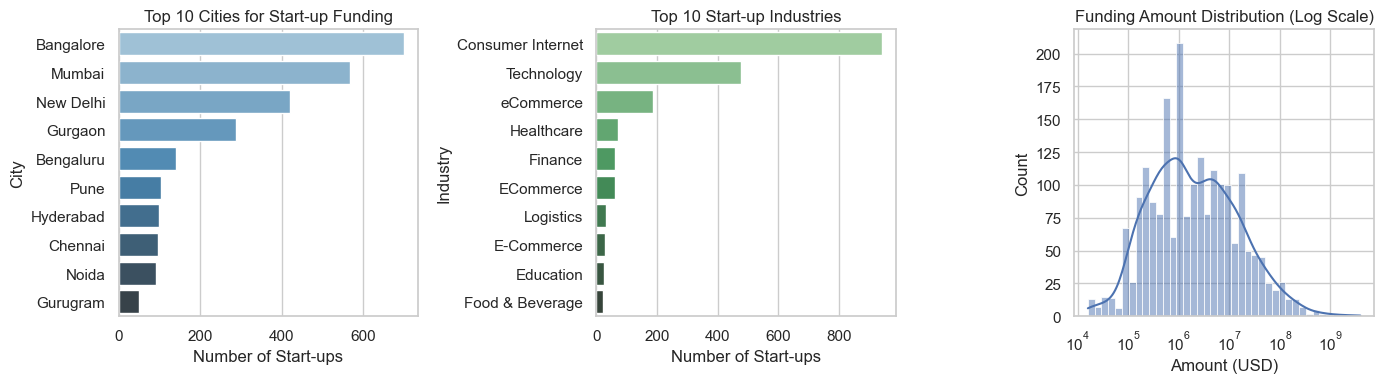

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Top 10 cities by number of start-ups
top_cities = df['City'].value_counts().head(10)

# Top 10 industries by number of start-ups
top_industries = df['Industry'].value_counts().head(10)

# Distribution of funding amounts
plt.figure(figsize=(14, 4))

# Plot 1: Top Cities
plt.subplot(1, 3, 1)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Blues_d")
plt.title("Top 10 Cities for Start-up Funding")
plt.xlabel("Number of Start-ups")
plt.ylabel("City")

# Plot 2: Top Industries
plt.subplot(1, 3, 2)
sns.barplot(x=top_industries.values, y=top_industries.index, palette="Greens_d")
plt.title("Top 10 Start-up Industries")
plt.xlabel("Number of Start-ups")
plt.ylabel("Industry")

# Plot 3: Distribution of Funding Amounts (log scale)
plt.subplot(1, 3, 3)
sns.histplot(df['AmountUSD'].dropna(), bins=40, kde=True, log_scale=True)
plt.title("Funding Amount Distribution (Log Scale)")
plt.xlabel("Amount (USD)")
plt.tight_layout()

plt.show()


In [13]:
# Drop rows where target variable (AmountUSD) is missing
df_clean = df.dropna(subset=['AmountUSD'])

# Fill 'Industry' and 'City' with "Unknown"
df_clean['Industry'] = df_clean['Industry'].fillna('Unknown')
df_clean['City'] = df_clean['City'].fillna('Unknown')

# Drop rows where 'Date', 'Investors', or 'InvestmentType' is missing (very few)
df_clean = df_clean.dropna(subset=['Date', 'Investors', 'InvestmentType'])

# Drop 'SubVertical' column (too sparse)
df_clean = df_clean.drop(columns=['SubVertical'])

# Show remaining data info
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SrNo            2036 non-null   int64         
 1   Date            2036 non-null   datetime64[ns]
 2   Startup         2036 non-null   object        
 3   Industry        2036 non-null   object        
 4   City            2036 non-null   object        
 5   Investors       2036 non-null   object        
 6   InvestmentType  2036 non-null   object        
 7   AmountUSD       2036 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 143.2+ KB


/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/351933845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Industry'] = df_clean['Industry'].fillna('Unknown')
/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/351933845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['City'] = df_clean['City'].fillna('Unknown')


/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/18904905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investment_counts.values, y=investment_counts.index, palette="Oranges_r")
/var/folders/y7/vrg2_twx4yl5qwfp4rbm7ntm0000gn/T/ipykernel_72410/18904905.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette="Purples_r")


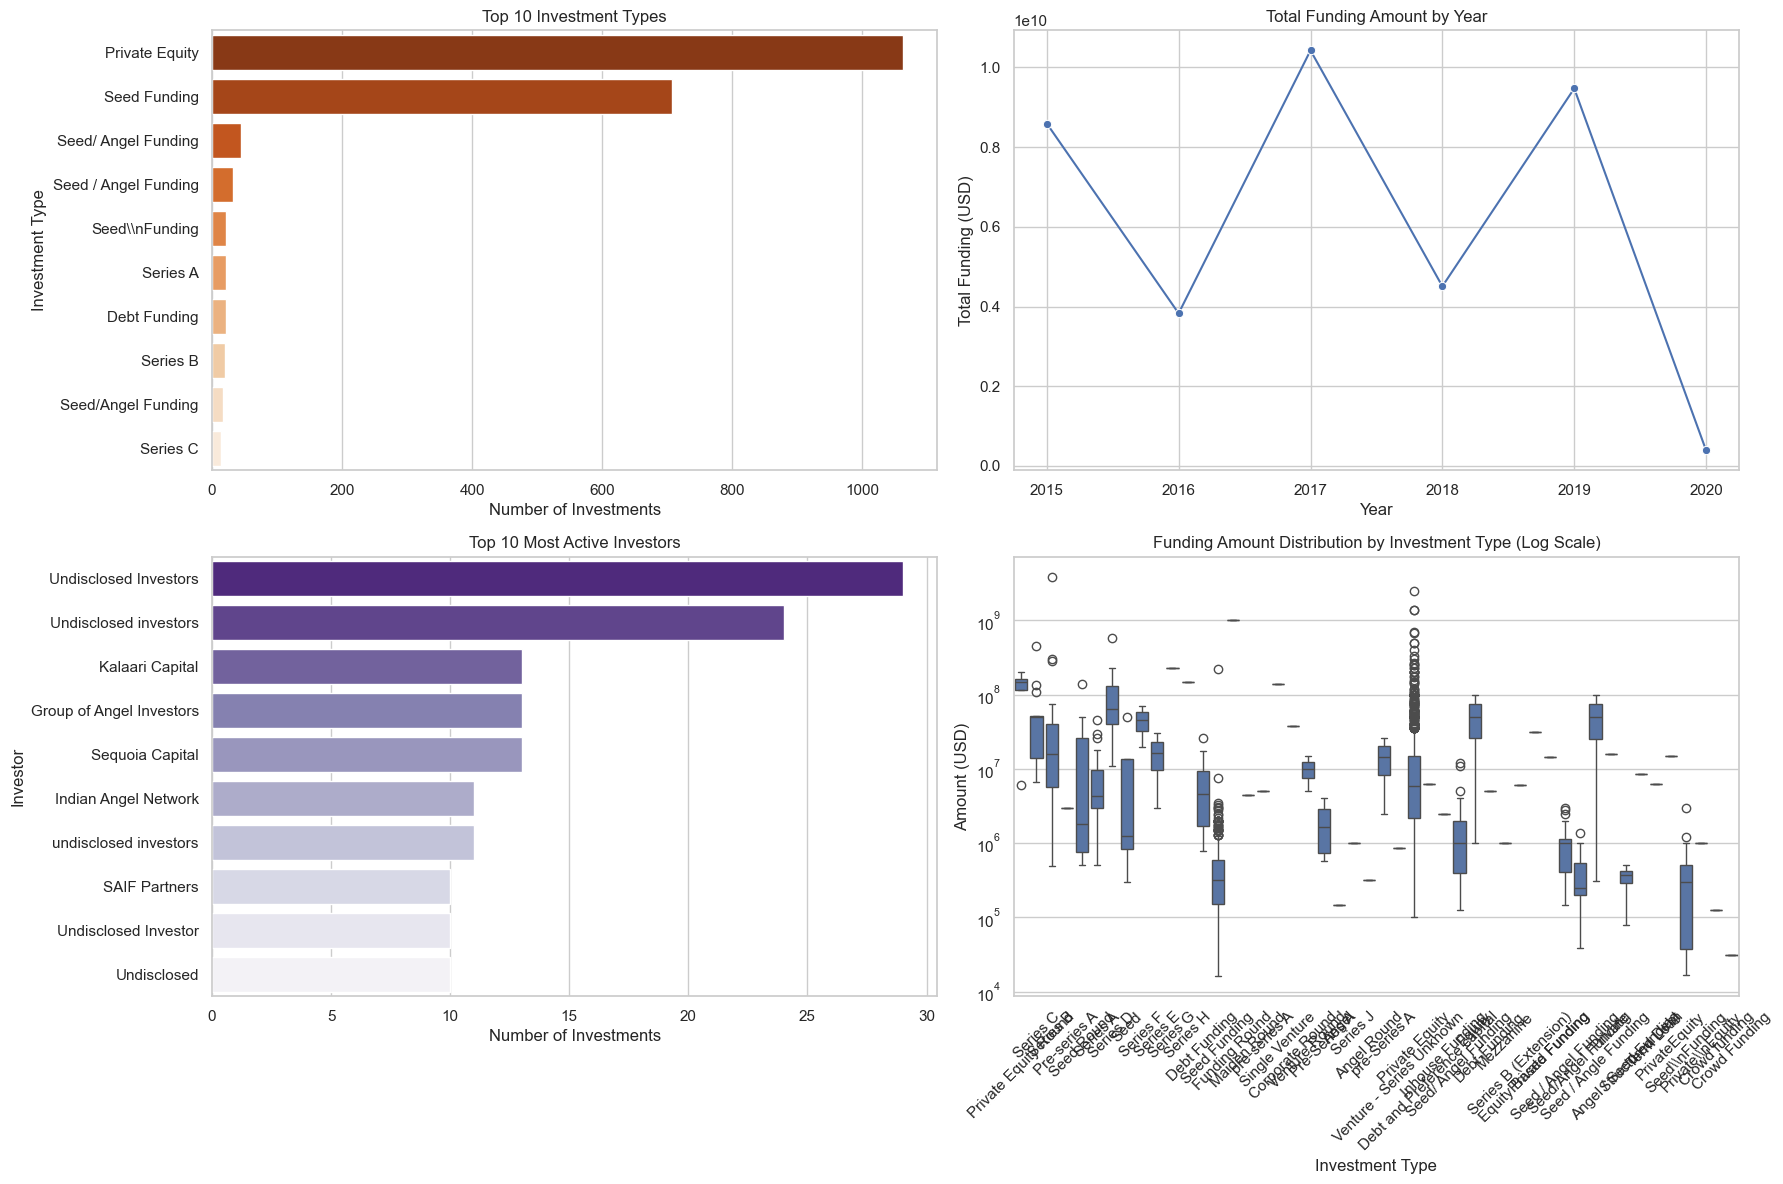

In [15]:
# Plotting more EDA visuals

plt.figure(figsize=(18, 12))

# 1. Top 10 Investment Types
plt.subplot(2, 2, 1)
investment_counts = df_clean['InvestmentType'].value_counts().head(10)
sns.barplot(x=investment_counts.values, y=investment_counts.index, palette="Oranges_r")
plt.title("Top 10 Investment Types")
plt.xlabel("Number of Investments")
plt.ylabel("Investment Type")

# 2. Funding over Time (Yearly Trend)
plt.subplot(2, 2, 2)
df_clean['Year'] = df_clean['Date'].dt.year
yearly_funding = df_clean.groupby('Year')['AmountUSD'].sum()
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker='o')
plt.title("Total Funding Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")

# 3. Top 10 Investors by Frequency
plt.subplot(2, 2, 3)
top_investors = df_clean['Investors'].value_counts().head(10)
sns.barplot(x=top_investors.values, y=top_investors.index, palette="Purples_r")
plt.title("Top 10 Most Active Investors")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")

# 4. Funding Amount by Investment Type (Boxplot)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_clean, x='InvestmentType', y='AmountUSD')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Funding Amount Distribution by Investment Type (Log Scale)")
plt.xlabel("Investment Type")
plt.ylabel("Amount (USD)")

plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Select relevant columns for clustering
cluster_df = df_clean[['AmountUSD', 'Industry', 'City', 'InvestmentType']].copy()

# Step 2: One-hot encode categorical features
cluster_encoded = pd.get_dummies(cluster_df, columns=['Industry', 'City', 'InvestmentType'])

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_encoded)

# Step 4: Run K-Means clustering (let's start with 4 clusters for visualization)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 5: Reduce dimensions with PCA for 2D plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA and cluster info for plotting
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['Cluster'] = kmeans_labels

plot_df.head()


,PC1,PC2,Cluster
0,4.640400,6.129539,0
1,3.265544,-0.263907,0
2,4.448501,-0.444155,0
3,3.882613,0.239859,0
4,4.276710,3.029202,0


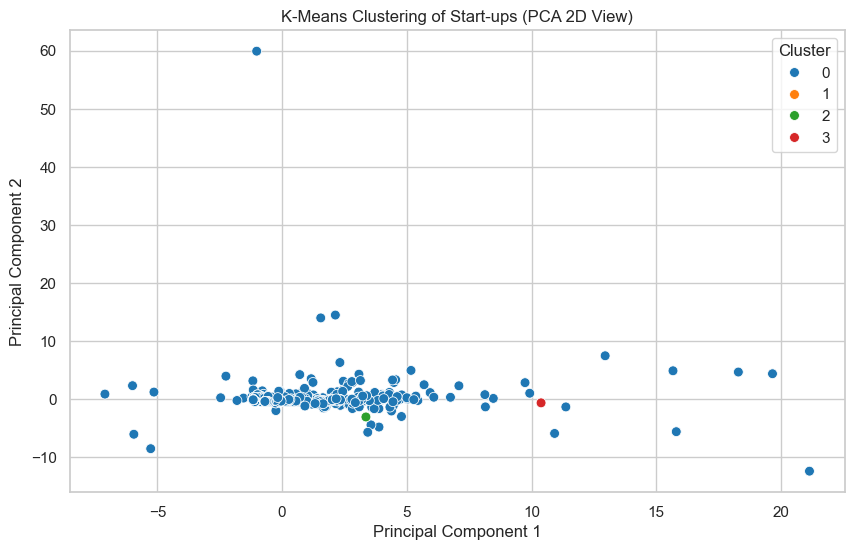

In [21]:
# Fix KMeans parameter
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Prepare dataframe for plotting
plot_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plot_df['Cluster'] = kmeans_labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=50)
plt.title("K-Means Clustering of Start-ups (PCA 2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


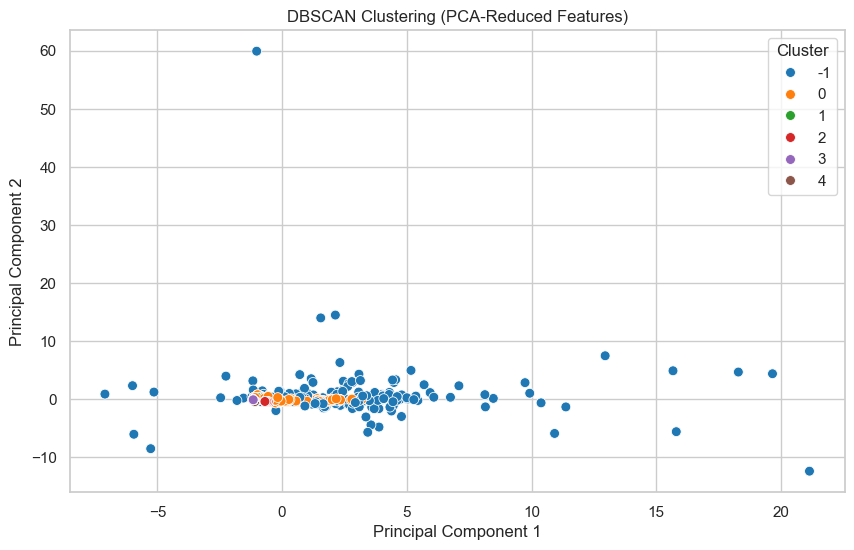

In [25]:
# Step 1: Reduce dimensions before DBSCAN
pca_dbscan = PCA(n_components=20)
X_reduced = pca_dbscan.fit_transform(X_scaled)

# Step 2: Apply DBSCAN on reduced features
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_reduced)

# Step 3: Plot in 2D (use previous PCA)
plot_df['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='tab10', s=50)
plt.title("DBSCAN Clustering (PCA-Reduced Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


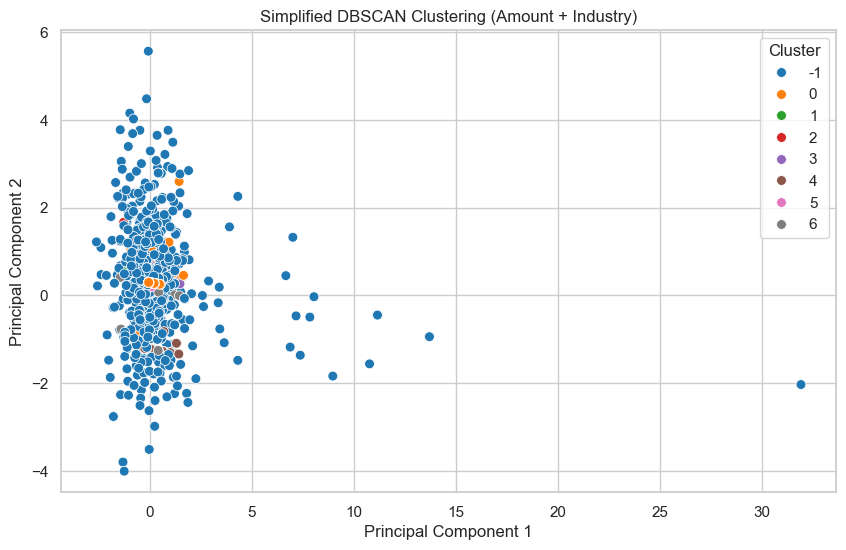

In [27]:
# Simplified feature set for DBSCAN: only 'AmountUSD' and 'Industry'
cluster_simple = df_clean[['AmountUSD', 'Industry']].copy()

# One-hot encode 'Industry' only
cluster_simple_encoded = pd.get_dummies(cluster_simple, columns=['Industry'])

# Standardize
X_simple_scaled = scaler.fit_transform(cluster_simple_encoded)

# PCA reduction for DBSCAN
X_simple_pca = PCA(n_components=5).fit_transform(X_simple_scaled)

# Run DBSCAN on reduced data
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels_simple = dbscan.fit_predict(X_simple_pca)

# Visualize using first 2 PCA components
X_vis = PCA(n_components=2).fit_transform(X_simple_scaled)
plot_simple = pd.DataFrame(X_vis, columns=['PC1', 'PC2'])
plot_simple['Cluster'] = dbscan_labels_simple

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_simple, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=50)
plt.title("Simplified DBSCAN Clustering (Amount + Industry)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Feature selection
regression_df = df_clean[['AmountUSD', 'Industry', 'City', 'InvestmentType']].copy()

# Step 2: One-hot encode categorical variables
regression_encoded = pd.get_dummies(regression_df, columns=['Industry', 'City', 'InvestmentType'])

# Step 3: Split into features and target
X = regression_encoded.drop(columns='AmountUSD')
y = regression_encoded['AmountUSD']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train three models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Step 6: Predictions
pred_lr = lr.predict(X_test)
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

# Step 7: Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):,.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("—" * 40)

# Evaluate each model
evaluate_model("Linear Regression", y_test, pred_lr)
evaluate_model("Decision Tree", y_test, pred_dt)
evaluate_model("Random Forest", y_test, pred_rf)


📊 Linear Regression
R² Score: -157499813920011684713332736.000
MAE: 161,663,427,272,213,889,024.00
RMSE: 503782276831727779840.00
————————————————————————————————————————
📊 Decision Tree
R² Score: -0.905
MAE: 17,881,051.12
RMSE: 55398668.90
————————————————————————————————————————
📊 Random Forest
R² Score: -1.195
MAE: 18,369,815.38
RMSE: 59474403.06
————————————————————————————————————————


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Light tuning grid
param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
pred = best_tree.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Tuned Decision Tree:")
print("R²:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


Tuned Decision Tree:
R²: -0.16374045333781995
MAE: 17679805.58752628
RMSE: 43304290.55060198
